In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

In [2]:
def beta_pdf(x, a, b):
    return scipy.stats.beta.pdf(x, a, b)

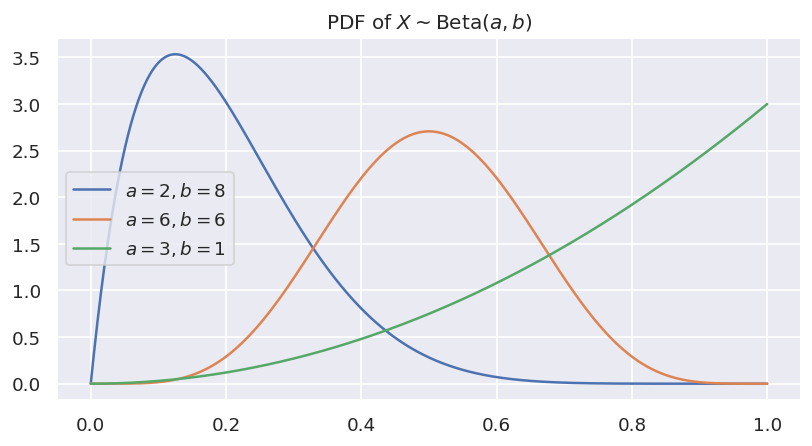

In [3]:
As = [2, 6, 3]
Bs = [8, 6, 1]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.linspace(start=0, stop=1, num=1000)
for A, B in zip(As, Bs):
    f = beta_pdf(x, A, B)
    plt.plot(x, f, label=f'$a = {A}, b = {B}$')
plt.title('PDF of $X \sim$Beta$(a, b)$')
plt.legend()
plt.show()

In [4]:
def importance_sampling(f, p_pdf, q_pdf, q_sample, N, return_history=False):
    x = q_sample(N)
    f = f(x) * p_pdf(x) / q_pdf(x)
    history = np.cumsum(f) / np.arange(1, N+1, 1)

    if return_history:
        return history[-1], history
    else:
        return history[-1]

In [5]:
def uniform_pdf(x, a=0.0, b=1.0):
    return 1.0 * (a <= x) * (x <= b)

def uniform_sample(N, a=0.0, b=1.0):
    return np.random.rand(N) * (b - a) + a

In [6]:
a1 = 2.0
b1 = 8.0
N1 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a1, b1)
q_pdf = uniform_pdf
q_sample = uniform_sample

u1, h1 = importance_sampling(f, p_pdf, q_pdf, q_sample, N=N1, return_history=True)

Estimated value: 0.20004941722168576
Real value 0.2


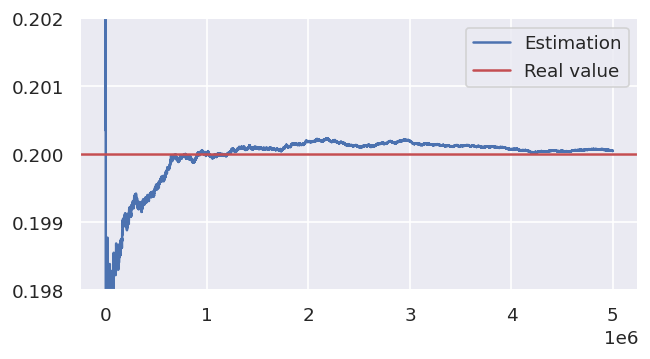

In [7]:
r1 = a1 / (a1 + b1)

print('Estimated value:', u1)
print('Real value', r1)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h1), step)
sns.lineplot(x=x, y=h1[x], label='Estimation')
plt.axhline(r1, color='r', label='Real value')
plt.ylim(r1 - 0.002, r1 + 0.002)
plt.legend()
plt.show()

In [8]:
a2 = 3.0
b2 = 1.0
N2 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a2, b2)
q_pdf = uniform_pdf
q_sample = uniform_sample

u2, h2 = importance_sampling(f, p_pdf, q_pdf, q_sample, N=N2, return_history=True)

Estimated value: 0.7497657664896786
Real value 0.75


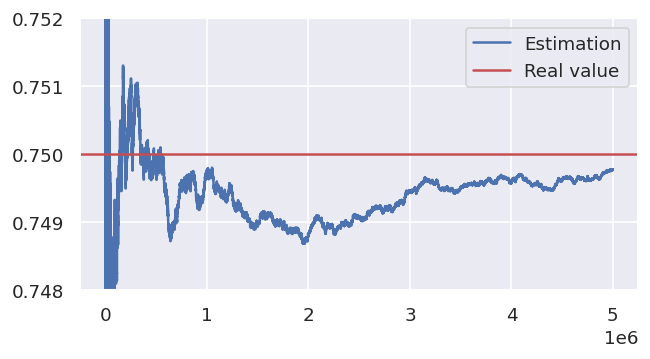

In [9]:
r2 = a2 / (a2 + b2)

print('Estimated value:', u2)
print('Real value', r2)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h2), step)
sns.lineplot(x=x, y=h2[x], label='Estimation')
plt.axhline(r2, color='r', label='Real value')
plt.ylim(r2 - 0.002, r2 + 0.002)
plt.legend()
plt.show()

In [10]:
def normal_pdf(x, mu, sigma):
    return scipy.stats.norm.pdf(x, mu, sigma)

def normal_sample(N, mu, sigma):
    return np.random.randn(N) * sigma + mu

In [11]:
a1 = 2.0
b1 = 8.0
N1 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a1, b1)

mu1, sigma1 = 0.2, 0.2
q1_pdf = lambda x: normal_pdf(x, mu1, sigma1)
q1_sample = lambda N: normal_sample(N, mu1, sigma1)

mu2, sigma2 = 0.8, 0.2
q2_pdf = lambda x: normal_pdf(x, mu2, sigma2)
q2_sample = lambda N: normal_sample(N, mu2, sigma2)

u3, h3 = importance_sampling(f, p_pdf, q1_pdf, q1_sample, N=N1, return_history=True)
u4, h4 = importance_sampling(f, p_pdf, q2_pdf, q2_sample, N=N1, return_history=True)

Estimated value 1: 0.20001056054283142
Estimated value 2: 0.20095141689503415
Real value 0.2


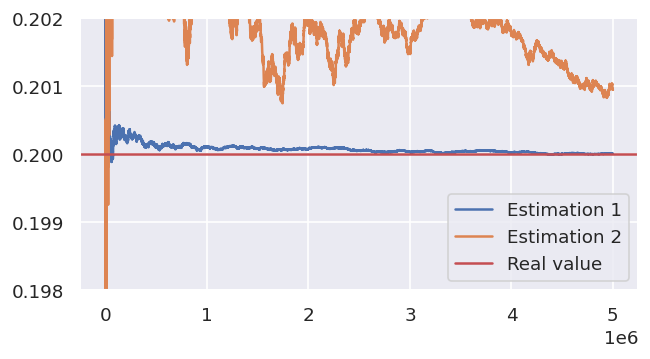

In [12]:
r1 = a1 / (a1 + b1)

print('Estimated value 1:', u3)
print('Estimated value 2:', u4)
print('Real value', r1)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h3), step)
sns.lineplot(x=x, y=h3[x], label='Estimation 1')
sns.lineplot(x=x, y=h4[x], label='Estimation 2')
plt.axhline(r1, color='r', label='Real value')
plt.ylim(r1 - 0.002, r1 + 0.002)
plt.legend()
plt.show()

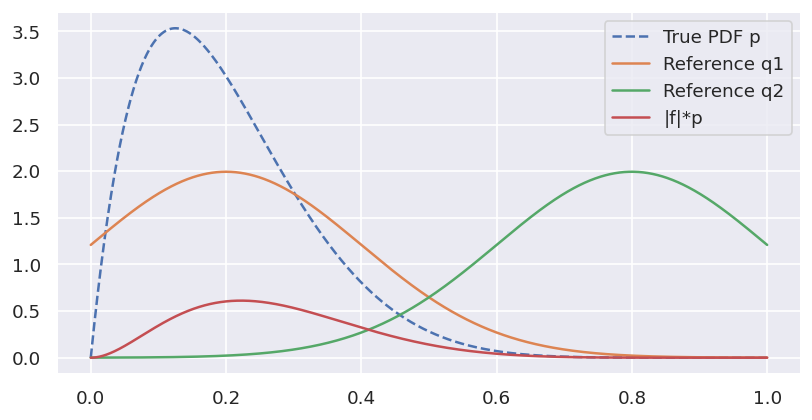

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=120)

x = np.linspace(start=0, stop=1, num=1000)
f = x
p = beta_pdf(x, 2, 8)
q1 = normal_pdf(x, 0.2, 0.2)
q2 = normal_pdf(x, 0.8, 0.2)
plt.plot(x, p, label='True PDF p', linestyle='dashed')
plt.plot(x, q1, label='Reference q1')
plt.plot(x, q2, label='Reference q2')
plt.plot(x, np.abs(f) * p, label='|f|*p')

plt.legend()
plt.show()